In [2]:
problem={"1": ["● Predict the percentage of an student based on the no. of study hours. "],
"2": ["● This is a simple linear regresson problem, it involve just two variables"],
"3": ["● You can use R, Python, SAS Enterprise Miner or any other tool"],
"4": ["● Data can be found at http://bit.ly/w-data"],
"5": ["● What will be predicted score if a student studies for 9.25 hrs/ day?"],
"6": ["● Sample Solution : https://bit.ly/2HxiGGJ"]}

##Rewriting the problem in dictionary formate so that we can view it again whenever we need.

## 1. Problem Definition

● Predict the percentage of an student based on the no. of study hours.

● Since this problem has continuous valued output,It must be a Supervised Regresson problem (Supervised, because it has data     and corresponding labels)

● It it clear that we can use machine learning model to solve this proble, Now let's dive into the data available for
this problem

##  2.Data
● Let's  make ourselve familiar with data so that we can use it in modelling.

● we also check if the data availabe to us is relatable to our problem or not.

## 3. Evaluation

What defines success for us, Is 90% score good enough for our problem.

Since the given problem does'nt have any evaluation criteria we will not go deep into model evaluation


## 4. Features

What features do we have in our data, which feature can we use in our modelling
In this section we will be discussing more about the data with the subject matter expert
Are they Worth incorporating in our model?

## 5. Modelling

When we are done whith the above steps, then we will dive into modelling
This section comprise of three steps

1. Choosing a right model for our problem (For this we can follow the Scikit-learn model selection diagram)

2. Tuning the model (Improving our model by changing the hyperparameters)

3. Model comparison (comparing the model with some other models. In some problem simple model tends to work best than complex models)

## 6. Experimentation

This is also an import part of the machine learning
What else could we try? How do the other steps change based on what we’ve found? Does our deployed model do as we expected?
our biggest goal should be minimising the time between offline experiments and online experiments.

In [3]:
# importing Required Python Libraries for this Project
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("student_scores.csv")

In [5]:
df.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df["Hours"]

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

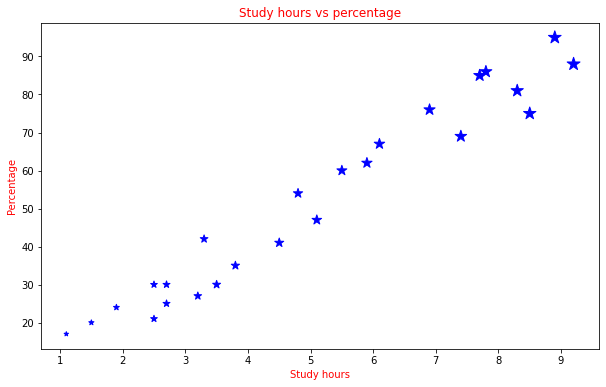

In [8]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df["Hours"],df["Scores"],marker="*",c="blue",s=20*df["Hours"])
plt.title("Study hours vs percentage",color="red")
plt.xlabel("Study hours",color="red")
plt.ylabel("Percentage",color="red")
plt.show()

#### From the graph we can clearly see that there is a positve relation between study hours and percentage

In [10]:
# Now let's seprate the data into input and output sets
X=df["Hours"]
X.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [11]:
y=df["Scores"]
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [12]:
#Now split the data into test and traing sets
#we will use scikit-learn modeule to split our data into the train and test
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
X_train.head()

20    2.7
11    5.9
19    7.4
7     5.5
4     3.5
Name: Hours, dtype: float64

In [15]:
X_test.head()

6     9.2
13    3.3
8     8.3
9     2.7
15    8.9
Name: Hours, dtype: float64

In [16]:
y_train.head()

20    30
11    62
19    69
7     60
4     30
Name: Scores, dtype: int64

In [17]:
y_test.head()

6     88
13    42
8     81
9     25
15    95
Name: Scores, dtype: int64

In [18]:
X_train.shape

(20,)

In [69]:
arr=np.array(X_train)
arr

array([2.7, 5.9, 7.4, 5.5, 3.5, 4.8, 2.5, 1.5, 7.8, 3.2, 8.5, 3.8, 4.5,
       1.9, 7.7, 5.1, 1.1, 6.1, 6.9, 2.5])

In [67]:
# LinearRegresson accept 2D array that's why we have to reshape it in 2D array
ar=arr.reshape(-1,1)

In [21]:
y_train=np.array(y_train)

In [22]:
#Same reason (converting into 2D array)
y_train=y_train.reshape(-1,1)

# Modelling
>> I would be using LinearRegresson model for this project

In [23]:
# Now that we have completed necessary steps for modelling, It's time to choose a model and train it for making predictions
from sklearn.linear_model import LinearRegression
model=LinearRegression(n_jobs=-1)
model.fit(ar,y_train)

LinearRegression(n_jobs=-1)

In [24]:
model.intercept_

array([1.99146461])

In [25]:
model.coef_

array([[9.86190213]])

In [63]:
x=np.array(X)

In [64]:
x=x.reshape(-1,1)

In [66]:
x.shape

(25, 1)

In [28]:
line=model.intercept_+model.coef_*x

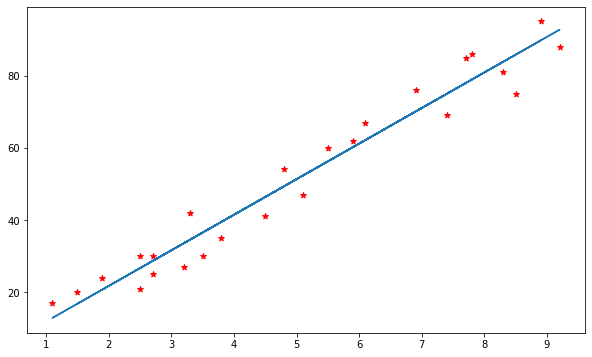

In [29]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(X,y,marker="*",c="red")
ax.plot(x,line)
plt.show()

In [32]:
X_test=np.array(X_test)
X_test.shape

(5,)

In [70]:
X_test=X_test.reshape(5,1)

In [71]:
predic=model.predict(X_test)

In [82]:
predic=predic.reshape(5,)

In [84]:
predic.dtype

dtype('float64')

In [85]:
result=pd.DataFrame({"Actual": y_test,
                    "predicted": predic})

In [86]:
result

,Actual,predicted
6,88,92.720964
13,42,34.535742
8,81,83.845252
9,25,28.618600
15,95,89.762394


In [92]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
time=9.25
hours=np.array(time)
hours=hours.reshape(-1,1)

In [99]:
percent=model.predict(hours)
percentage=percent[0]
print(f"studied {time} hours a day")
print(f"predicted score {percentage} %")

studied 9.25 hours a day
predicted score [93.21405931] %


# Model Evaluation

>>The final step is evaluating the model, our purpose should be minimizing the square error or maximizing the r^2 score
>>model Evaluation is the best way to assess different models 
>> for this project i would go with r^2 (co_efficient of determination) and mean absolute error


In [102]:
# import the evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error

In [110]:
#Defing a function for model evaluation whicj will take two params actual labels and predicted labels

def eval(y_test,predict):
    """Return r^2_score and mean absolute error"""
    r=r2_score(y_test,predict)
    MAE=mean_absolute_error(y_test,predict)
    result={"r^2_score": r,
           "Mean_absolute_error": MAE}
    return result

In [105]:
eval(y_test,predic)

{'r^2_score': 0.9667371791999099, 'Mean_absolute_error': 4.777336328919412}

In [108]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -1,
 'normalize': False,
 'positive': False}

In [109]:
problem

{'1': ['● Predict the percentage of an student based on the no. of study hours. '],
 '2': ['● This is a simple linear regresson problem, it involve just two variables'],
 '3': ['● You can use R, Python, SAS Enterprise Miner or any other tool'],
 '4': ['● Data can be found at http://bit.ly/w-data'],
 '5': ['● What will be predicted score if a student studies for 9.25 hrs/ day?'],
 '6': ['● Sample Solution : https://bit.ly/2HxiGGJ']}